# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
Temp = []
MaxTemp = []
Humidity = []
Cloudiness = []
WindSpeed = []
Latitude = []
Longitude = []
CityID = []
City = []
LatLong = []
CountryCode = []


for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        Latitude.append(response['coord']['lat'])
        Longitude.append(response['coord']['lon'])
        Humidity.append(response['main']['humidity'])
        Temp.append(response['main']['temp'])
        Cloudiness.append(response['clouds']['all'])
        WindSpeed.append(response['wind']['speed'])
        CityID.append(response['id'])
        City.append(response['name'])
        MaxTemp.append(response['main']['temp_max'])
        LatLong.append(response['coord'])
        CountryCode.append(response['sys']['country'])
        #print(f"processing City {city} CityID: {response['id']}")
        
    

In [6]:
### Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame
city_df = pd.DataFrame({'CityID' : CityID,
                    'City' : City,
                    'Humidity' : Humidity,
                    'Temp' : Temp,
                    'Latitude' : Latitude,
                    'Cloudiness' : Cloudiness,
                    'WindSpeed' : WindSpeed,
                    'MaxTemp' : MaxTemp,
                    'Longitude' : Longitude,
                     'LatLong' : LatLong,
                     'CountryCode' : CountryCode
                       })

city_df

city_df.to_csv('city_df.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

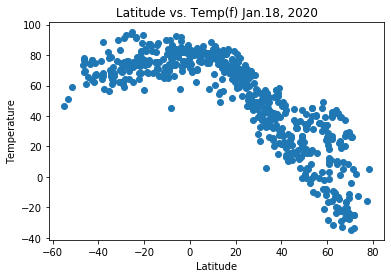

<Figure size 432x288 with 0 Axes>

In [8]:
x_values = city_df['Latitude']
y_values = city_df['Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temp(f) Jan.18, 2020')
plt.show()
plt.savefig('Latitude-Temp.png')
#This scatter plot is showing the relationship between Temperature and Latititue. It shows that the temperature is highest between
# -20 and +20 latitude, or the closer to 0 the higher the temp.


#### Latitude vs. Humidity Plot

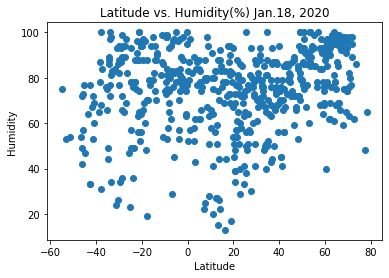

<Figure size 432x288 with 0 Axes>

In [9]:
x_values = city_df['Latitude']
y_values = city_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity(%) Jan.18, 2020')
plt.show()
plt.savefig('Latitude-Humidity.png')
#This is plotting the humidity % for each location based on it's latitude.

#### Latitude vs. Cloudiness Plot

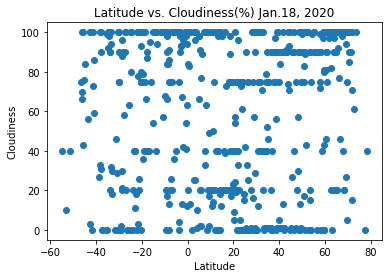

<Figure size 432x288 with 0 Axes>

In [10]:
x_values = city_df['Latitude']
y_values = city_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness(%) Jan.18, 2020')
plt.show()
plt.savefig('Latitude-Clouds.png')
#This scatter plot is showing the relationship between latitude and cloudiness, which does not seem to be linked.

#### Latitude vs. Wind Speed Plot

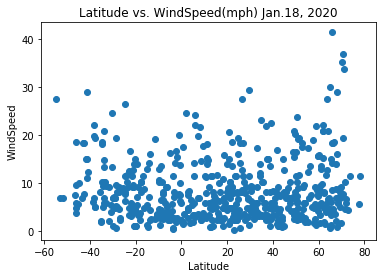

<Figure size 432x288 with 0 Axes>

In [11]:
x_values = city_df['Latitude']
y_values = city_df['WindSpeed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
plt.title('Latitude vs. WindSpeed(mph) Jan.18, 2020')
plt.show()
plt.savefig('Latitude-WindSpeed.png')
#This is plotting the wind speed of each latitude.

## Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames
NorthHemi_df = city_df[city_df['Latitude']>0]
SouthHemi_df = city_df[city_df['Latitude']<0]

NorthHemi_df.head()
SouthHemi_df.head()

,CityID,City,Humidity,Temp,Latitude,Cloudiness,WindSpeed,MaxTemp,Longitude,LatLong,CountryCode
0,3833367,Ushuaia,75,46.40,-54.80,40,27.51,46.40,-68.30,"{'lon': -68.3, 'lat': -54.8}",AR
1,3471451,Arraial do Cabo,88,73.40,-22.97,40,3.36,73.40,-42.03,"{'lon': -42.03, 'lat': -22.97}",BR
3,2163355,Hobart,33,76.48,-42.88,100,18.34,81.00,147.33,"{'lon': 147.33, 'lat': -42.88}",AU
10,2206939,Bluff,54,73.26,-46.60,75,7.43,73.26,168.33,"{'lon': 168.33, 'lat': -46.6}",NZ
11,4033356,Tiarei,70,87.44,-17.53,40,10.29,87.80,-149.33,"{'lon': -149.33, 'lat': -17.53}",PF


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

2      34.784764
4      -6.493408
5      46.914580
6      19.080397
7      28.805277
         ...    
561    46.770021
562     4.111968
563     6.727172
567    60.936806
569     8.488164
Name: Latitude, Length: 382, dtype: float64
y = -1.31x +90.11
The r-squared is: 0.7470882267054219


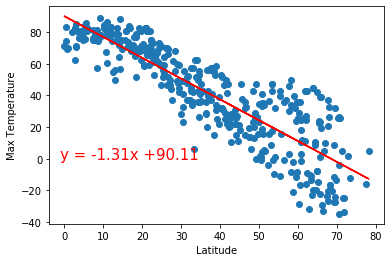

<Figure size 432x288 with 0 Axes>

In [15]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['MaxTemp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-1,0),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Temp North.png')
 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0      66.602301
1      74.733299
3      69.647274
10     68.696997
11     76.122952
         ...    
559    72.544086
564    80.358326
565    75.987563
566    74.268379
568    74.505948
Name: Latitude, Length: 188, dtype: float64
y = 0.26x +80.6
The r-squared is: 0.13858340343360637


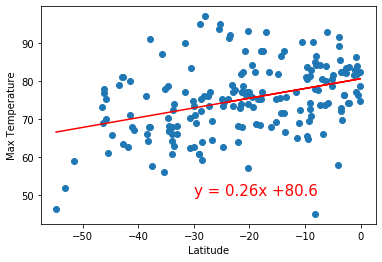

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['MaxTemp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Temp South.png')

In [ ]:
#These 2 plots are showing the max temperatures versus latitude in the northern and southern hemispheres. They show that there is a stronger relationship between latitude and max tempurature in the Northern Hemisphere
#and the max temp in both hemispheres get higher closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

2      75.529713
4      86.369516
5      72.344377
6      79.653739
7      77.099949
         ...    
561    72.382339
562    83.584505
563    82.897742
567    68.662088
569    82.435299
Name: Latitude, Length: 382, dtype: float64
y = 0.35x +61.0
The r-squared is: 0.1530715066979051


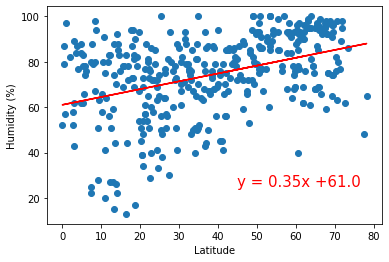

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Humidity North.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      62.579834
1      74.576759
3      67.072556
10     65.670465
11     76.627129
         ...    
559    71.346673
564    82.876235
565    76.427369
566    73.890790
568    74.241313
Name: Latitude, Length: 188, dtype: float64
y = 0.38x +83.23
The r-squared is: 0.07477674427110204


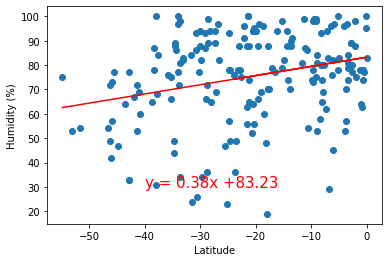

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Humidity South.png')

In [ ]:
#These 2 graphs are showing the relationship between latitude and humidity% inthe northern and southern hemispheres. Neither show a very strong corralation, except that they seem to get more humid as you go north.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

2      75.529713
4      86.369516
5      72.344377
6      79.653739
7      77.099949
         ...    
561    72.382339
562    83.584505
563    82.897742
567    68.662088
569    82.435299
Name: Latitude, Length: 382, dtype: float64
y = 0.35x +61.0
The r-squared is: 0.1530715066979051


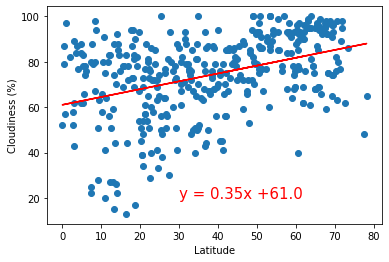

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Cloudiness North.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      53.133555
1      64.486927
3      57.385273
10     56.058394
11     66.427308
         ...    
559    61.430112
564    72.341191
565    66.238264
566    63.837755
568    64.169475
Name: Latitude, Length: 188, dtype: float64
y = 0.36x +72.68
The r-squared is: 0.017820886473011166


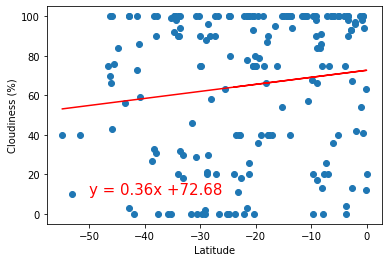

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Cloudiness South.png')

In [ ]:
#These 2 charts are plotting the cloudiness at each latitude. There doesn't seem to be much correlation between latutude and clouds except a little bit in the nothern hemisphere where it gets slightly more cloudy in higher latitudes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

2       8.610720
4      10.150582
5       8.158222
6       9.196564
7       8.833781
         ...    
561     8.163615
562     9.754954
563     9.657395
567     7.635130
569     9.591702
Name: Latitude, Length: 382, dtype: float64
y = 0.05x +6.55
The r-squared is: 0.023154847994377895


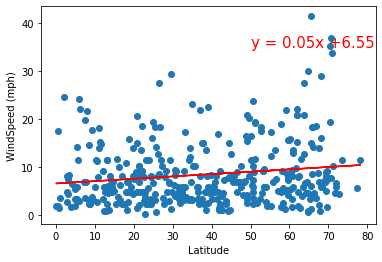

<Figure size 432x288 with 0 Axes>

In [26]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['WindSpeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('WindSpeed (mph)')
plt.annotate(line_eq,(50,35),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Wind North.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      12.231457
1       8.294291
3      10.757030
10     11.217170
11      7.621398
         ...    
559     9.354345
564     5.570559
565     7.686956
566     8.519413
568     8.404378
Name: Latitude, Length: 188, dtype: float64
y = -0.12x +5.45
The r-squared is: 0.0876231754558347


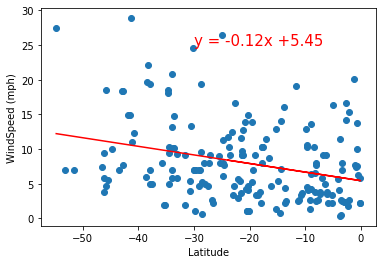

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['WindSpeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('WindSpeed (mph)')
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Wind South.png')

In [ ]:
#These two are showing the correlation between wind speed in mph to latitude in the northern and southern hemispheres.